In [1]:
from shapely.geometry import Point
import seaborn as sns
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

sns.set_style("dark")

In [2]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip = cases_by_zip.reset_index()
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Zip,Cases,ZIP
0,37013.0,13354,37013.0
18,37211.0,10233,37211.0
16,37209.0,5072,37209.0
14,37207.0,4729,37207.0
6,37115.0,4574,37115.0


In [3]:
top_5_z=cases_zip_ord.head(5)

In [4]:
top_5_b=cases_zip_ord.tail(5)
top_5_b

,Zip,Cases,ZIP
26,37219.0,270,37219.0
1,37027.0,231,37027.0
20,37213.0,65,37213.0
2,37069.0,16,37069.0
30,37238.0,3,37238.0


In [5]:
case_count_top=case_count_df[case_count_df['Zip'].isin(top_5_z.ZIP)]
case_count_top.head(5)

,Specimen Collection Date,Zip,Cases,date
2,3/11/2020,37013.0,1,2020-03-11
10,3/12/2020,37013.0,1,2020-03-12
12,3/12/2020,37211.0,1,2020-03-12
18,3/13/2020,37013.0,1,2020-03-13
24,3/13/2020,37211.0,1,2020-03-13


In [6]:
case_count_bot=case_count_df[case_count_df['Zip'].isin(top_5_b.ZIP)]
case_count_bot.head(5)

,Specimen Collection Date,Zip,Cases,date
28,3/13/2020,37219.0,1,2020-03-13
33,3/14/2020,37027.0,1,2020-03-14
52,3/16/2020,37027.0,1,2020-03-16
81,3/17/2020,37219.0,1,2020-03-17
99,3/18/2020,37219.0,1,2020-03-18


# run this next cell twice. would love a coding solution to not having to say this

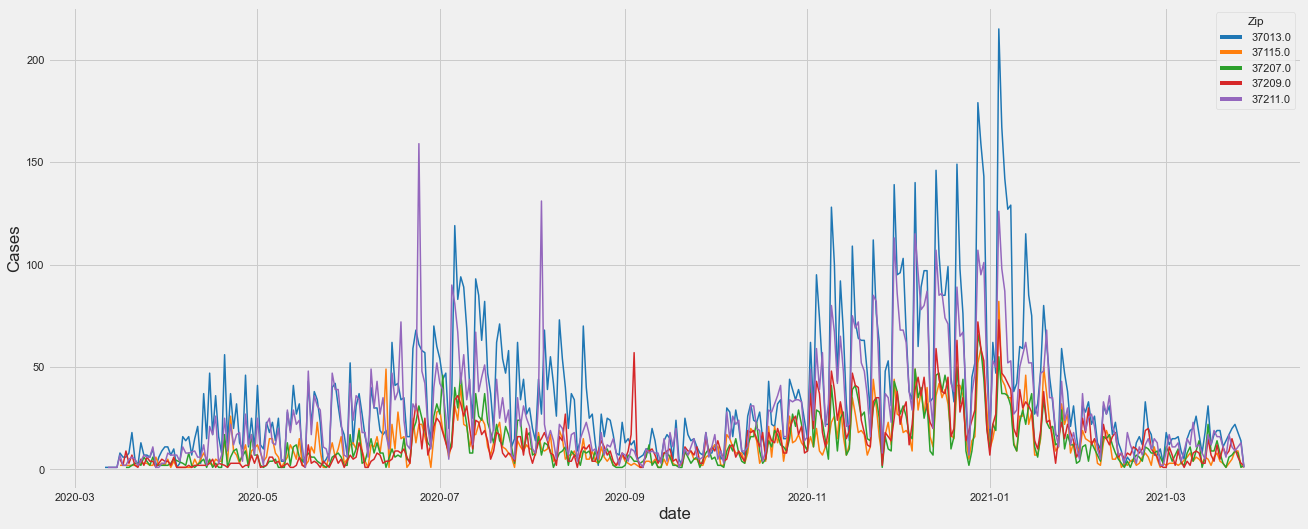

In [26]:
sns.lineplot(data=case_count_top, x="date", y="Cases", hue='Zip', palette='tab10', linewidth=1.5)
mpl.rcParams['figure.figsize'] = 21,12
#sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'white'})##trying to figure out more settings, not currently working

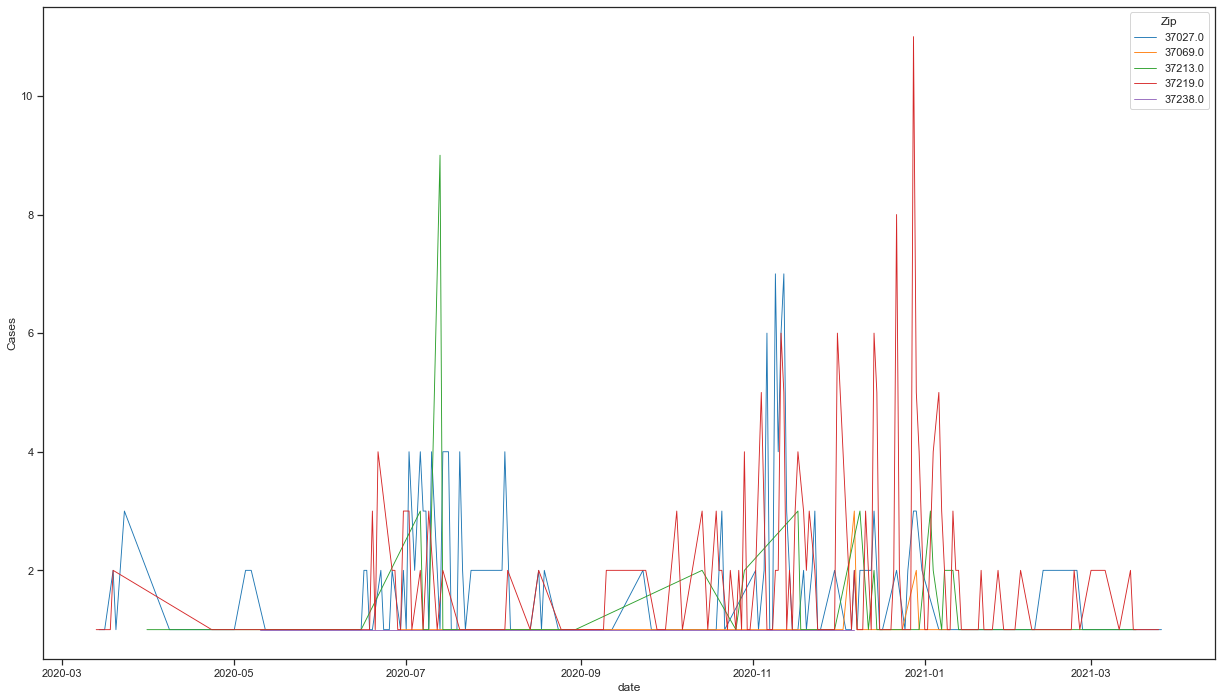

In [8]:
sns.set_palette("tab10")
sns.set(style="ticks", rc={"lines.linewidth": 0.9})
g=sns.lineplot(data=case_count_bot, x="date", y="Cases", hue='Zip', palette='tab10')
mpl.rcParams['figure.figsize'] = 20,8.27

In [9]:
#GB=case_count_df.groupby([(case_count_df.date.year),(case_count_df.date.month)]).sum()

month= case_count_df.groupby([case_count_df['date'].dt.year, 
                                case_count_df['date'].dt.month,
                                case_count_df['Zip']]).agg({'Cases':sum})
month

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

In [10]:
month_data = pd.DataFrame(data=month)
month_data

Cases
date date Zip           
2020 3    37013.0    128
          37027.0      8
          37072.0     11
          37076.0     23
          37080.0      1
...                  ...
2021 3    37218.0     44
          37219.0     12
          37220.0     26
          37221.0    120
          37228.0     15

[384 rows x 1 columns]

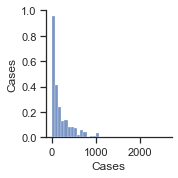

In [11]:
sns.pairplot(month_data)  

In [12]:
case_count_df=pd.read_csv('data/covid_count.csv')
case_count_df['date']=pd.to_datetime(case_count_df['Specimen Collection Date'])
cases_by_zip=case_count_df.groupby(['Zip']).sum()
cases_by_zip['ZIP'] = cases_by_zip.index
cases_by_zip = cases_by_zip.reset_index()
cases_by_zip['ZIP'] = cases_by_zip.loc[:, ['ZIP']].astype(float)
cases_zip_ord=cases_by_zip.sort_values(by=['Cases'], ascending=False)
cases_zip_ord.head(5)

,Zip,Cases,ZIP
0,37013.0,13354,37013.0
18,37211.0,10233,37211.0
16,37209.0,5072,37209.0
14,37207.0,4729,37207.0
6,37115.0,4574,37115.0


In [13]:
vaccine_count_df=pd.read_csv('data/vaccine_with_protocol.csv')
vaccine_count_df['date']=pd.to_datetime(vaccine_count_df['vacc_date'])
vac_by_zip=vaccine_count_df.groupby(['zipcode']).sum()
vac_by_zip['ZIP'] = vac_by_zip.index
vac_by_zip = vac_by_zip.reset_index()
vac_by_zip['ZIP'] = vac_by_zip.loc[:, ['ZIP']].astype(float)
vac_zip_ord=vac_by_zip.sort_values(by=['count_given'], ascending=False)
vac_zip_ord.head(5)

,zipcode,count_given,dose_nbr,ZIP
18,37211.0,28477.0,340.0,37211.0
28,37221.0,27622.0,339.0,37221.0
0,37013.0,27167.0,329.0,37013.0
12,37205.0,24451.0,342.0,37205.0
16,37209.0,20553.0,342.0,37209.0


In [14]:
vaccine_count_df.head(5)

,vacc_date,zipcode,count_given,dose_nbr,protocol,date
0,2020-12-12,37215.0,1.0,1.0,two-shot,2020-12-12
1,2020-12-14,37205.0,1.0,2.0,two-shot,2020-12-14
2,2020-12-14,37215.0,1.0,1.0,two-shot,2020-12-14
3,2020-12-15,37221.0,1.0,1.0,two-shot,2020-12-15
4,2020-12-16,37215.0,1.0,1.0,two-shot,2020-12-16


In [15]:
zipcodes = gpd.read_file('../geospatial-python-workshop/data/zipcodes.geojson')
zipcodes['zip'] = zipcodes.loc[:, ['zip']].astype(float)


In [16]:
case_zip_map = pd.merge(left = zipcodes, right = cases_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')

#this "coords" shit is something I found online to get the zip labels to work on the map
case_zip_map['coords'] = case_zip_map['geometry'].apply(lambda x: x.representative_point().coords[:])
case_zip_map['coords'] = [coords[0] for coords in case_zip_map['coords']]

case_zip_map.head()


,zip,objectid,po_name,shape_stlength,shape_starea,geometry,Zip,Cases,ZIP,coords
0,37115.0,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...",37115.0,4574,37115.0,"(-86.71324727080966, 36.25527797251701)"
1,37216.0,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...",37216.0,2011,37216.0,"(-86.72709601005627, 36.217757551801)"
2,37204.0,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...",37204.0,1786,37204.0,"(-86.77555016772823, 36.105530811982504)"
3,37027.0,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...",37027.0,231,37027.0,"(-86.7772443474457, 36.038330449104)"
4,37027.0,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ...",37027.0,231,37027.0,"(-86.7222583883469, 36.009363232588)"


# labels on those zips now, baby

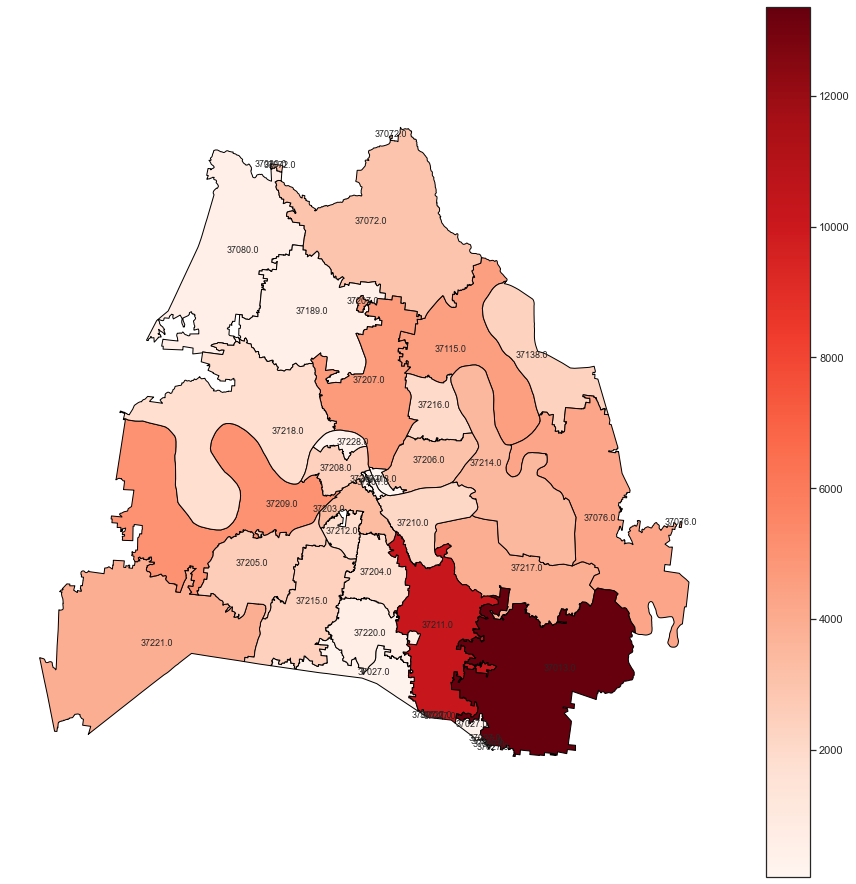

In [17]:
#okay so they don't look very good, but it's a step in the right direction!


fig, ax = plt.subplots(figsize=(16,16))
case_zip_map.plot(column = 'Cases',
                  cmap=plt.cm.get_cmap('Reds'),
                  edgecolor = 'black',
                  legend=True,
                  label=True,
                  ax = ax)
ax.axis('off')

#this is the second part of the above code to get the zip labels to show up
for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['Zip'], xy=row['coords'],horizontalalignment='center',fontsize=9)

''

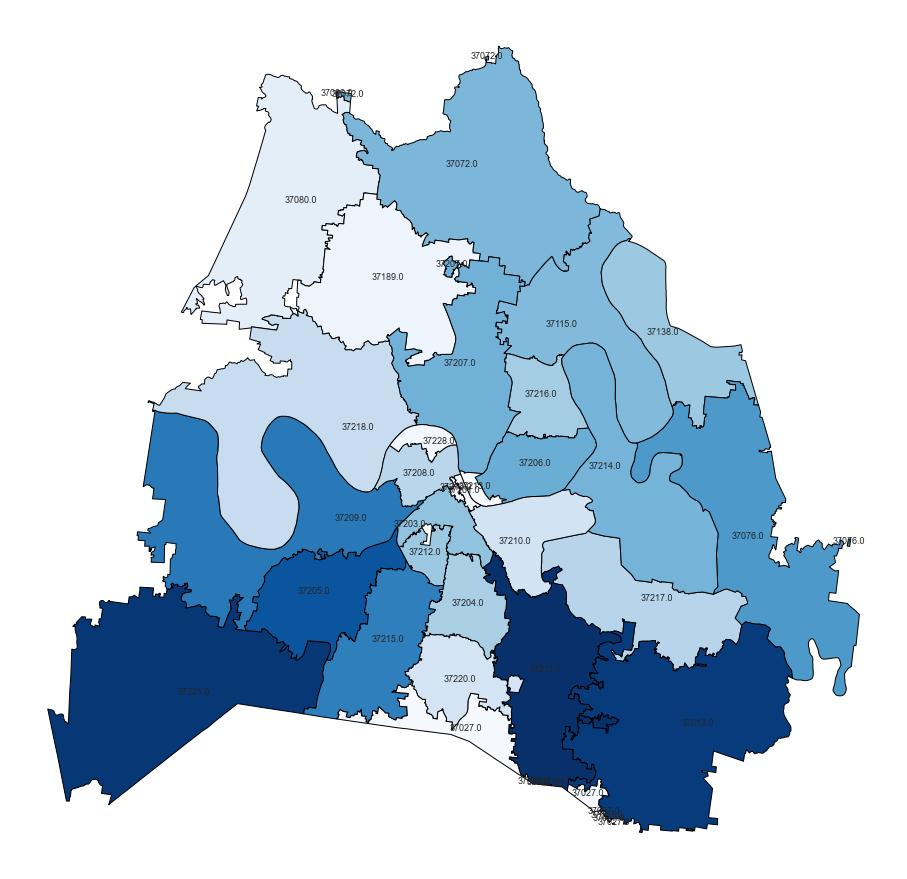

In [18]:
shot_zip_map = pd.merge(left = zipcodes, right = vac_by_zip, 
                    left_on = 'zip', right_on = 'ZIP')
fig, ax = plt.subplots(figsize=(16,16))
shot_zip_map.plot(column = 'count_given',
                  cmap=plt.cm.get_cmap('Blues'),
                  edgecolor = 'black',
                  label=True,
                  ax = ax)
ax.axis('off')

for idx, row in case_zip_map.iterrows():
    plt.annotate(text=row['Zip'], xy=row['coords'],horizontalalignment='center',fontsize=9)
;

In [19]:
#example code saved for later 
#1. covid_count=covid_count.fillna(0) #this converts all null/NaNs to zero
#2. Convert zip column to int: covid_count['Zip'] = covid_count['Zip'].astype(int)
#covid_count.isnull().sum()


In [20]:
pop_data = pd.read_excel("data/hisp.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
pop_data = pop_data[pop_data.columns.drop(list(pop_data.filter(regex='Error')))]
pop_data.columns = pop_data.columns.droplevel(1)
pop_data.head(5)

,Unnamed: 0_level_0,37010,37012,37013,37014,37015,37016,37020,37022,37025,...,38482,38483,38487,38547,38548,38552,38560,38563,38567,38569
0,Total:,4966,2185,97939,2835,17665,950,5984,6583,5698,...,1635,5910,1044,1939,931,157,1405,3410,685,69
1,Not Hispanic or Latino:,4803,2134,81131,2783,16768,944,5824,6286,5698,...,1574,5748,1022,1912,931,157,1405,3410,660,69
2,White alone,4502,2050,40080,2682,15842,939,5137,5968,5526,...,1525,5608,838,1884,930,157,1307,3202,615,69
3,Black or African American alone,245,73,33280,18,304,0,222,173,24,...,0,31,113,0,0,0,0,140,0,0
4,American Indian and Alaska Native alone,2,0,95,0,147,0,99,32,0,...,0,0,0,28,1,0,2,0,0,0


In [21]:
gend_data = pd.read_excel("data/gender_age.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
gend_data = gend_data[gend_data.columns.drop(list(gend_data.filter(regex='Error')))]
gend_data.columns = gend_data.columns.droplevel(1)
gend_data.head(5)

,Unnamed: 0_level_0,37013,37015,37027,37062,37064,37072,37073,37075,37076,...,37216,37217,37218,37219,37220,37221,37228,37240,37243,37246
0,Total:,97939,17665,56117,12185,58937,31492,14785,65986,40161,...,17848,30146,15721,1154,5880,41017,1615,796,0,0
1,Male:,47658,9112,27888,5990,27951,15327,7373,31603,19600,...,8877,15018,7083,737,2994,19437,708,332,0,0
2,Under 5 years,4550,527,1561,232,1803,881,440,2188,1457,...,435,1348,324,0,315,1508,0,0,0,0
3,5 to 9 years,3786,681,2093,349,1838,1131,697,2046,1273,...,421,1035,462,0,283,1354,0,0,0,0
4,10 to 14 years,3656,604,2511,536,2229,950,569,2242,1063,...,240,704,441,0,177,1002,0,0,0,0


In [22]:
ge_data = pd.read_excel("data/gender_ed.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
ge_data = ge_data[ge_data.columns.drop(list(ge_data.filter(regex='Error')))]
ge_data.columns = ge_data.columns.droplevel(1)
ge_data.head(5)

,Unnamed: 0_level_0,37010,37012,37013,37014,37015,37016,37020,37022,37025,...,38482,38483,38487,38547,38548,38552,38560,38563,38567,38569
0,Total:,3247,1675,62355,2012,12590,746,3815,4204,3894,...,1107,3785,720,1528,582,131,1042,2195,536,62
1,Male:,1514,850,29160,1000,6195,376,1976,1949,2083,...,618,1758,326,779,259,84,470,1028,276,31
2,No schooling completed,0,3,803,9,41,0,9,37,21,...,0,83,9,4,0,0,9,0,0,0
3,Nursery to 4th grade,0,0,223,0,15,0,0,0,0,...,0,9,0,0,0,0,0,0,0,0
4,5th and 6th grade,0,0,421,0,49,0,15,8,65,...,32,0,0,12,0,0,0,0,0,0


In [23]:
income_data = pd.read_excel("data/income.xlsx", skiprows = 1, header=[0, 1], sheet_name = 0)
income_data = income_data[income_data.columns.drop(list(income_data.filter(regex='Error')))]
income_data.columns = income_data.columns.droplevel(1)
income_data.head(5)

,Unnamed: 0_level_0,37013,37015,37027,37062,37064,37072,37073,37075,37076,...,37216,37217,37218,37219,37220,37221,37228,37240,37243,37246
0,Total:,35597,6673,19950,4040,21640,12533,5425,24275,17389,...,7923,12470,5854,829,2316,17959,1051,0,0,0
1,"Less than $10,000",1424,421,460,119,771,534,233,743,698,...,320,510,683,39,8,483,93,0,0,0
2,"$10,000 to $14,999",1023,256,173,122,302,412,151,422,405,...,198,472,339,0,18,408,59,0,0,0
3,"$15,000 to $19,999",1197,115,246,138,623,456,169,553,626,...,455,453,331,0,47,494,203,0,0,0
4,"$20,000 to $24,999",1751,415,250,140,512,674,236,687,496,...,290,646,254,0,51,481,68,0,0,0


In [24]:
pd.read_csv('data/hisp.csv')

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error"
0,86000US37010,37010,4966,647,4803,638,4502,664,245,170,...,20,75,0,12,53,65,0,12,53,65
1,86000US37012,37012,2185,338,2134,321,2050,321,73,75,...,0,12,0,12,4,9,0,12,4,9
2,86000US37013,37013,97939,2456,81131,2548,40080,1792,33280,2118,...,0,29,2464,757,608,315,357,221,251,222
3,86000US37014,37014,2835,382,2783,376,2682,374,18,28,...,0,12,0,12,12,19,12,19,0,12
4,86000US37015,37015,17665,734,16768,740,15842,746,304,115,...,0,19,221,114,39,39,37,39,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,86000US38552,38552,157,86,157,86,157,86,0,12,...,0,12,0,12,0,12,0,12,0,12
114,86000US38560,38560,1405,243,1405,243,1307,248,0,12,...,0,12,0,12,0,12,0,12,0,12
115,86000US38563,38563,3410,459,3410,459,3202,466,140,85,...,0,12,0,12,0,12,0,12,0,12
116,86000US38567,38567,685,288,660,291,615,286,0,12,...,0,12,0,12,25,45,25,45,0,12


In [25]:
#plot style I was curious about getting to work but moved on before success


plt.style.use('fivethirtyeight')

x = np.linspace(0, 10)

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x) + x + np.random.randn(50))
ax.plot(x, np.sin(x) + 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 0.5 * x + np.random.randn(50))
ax.plot(x, np.sin(x) - 2 * x + np.random.randn(50))
ax.plot(x, np.sin(x) + np.random.randn(50))
ax.set_title("'fivethirtyeight' style sheet")

plt.show()

NameError: name 'np' is not defined